# Simple linear regression
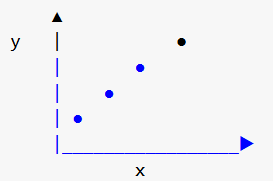

y = a * x + b


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Business Analytics/Teaching materials/MIS 315/Week 6 - Regression I/Reference Software for Analytics/Colleges and Universities.xlsx'

In [ ]:
df = pd.read_excel(file_path)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   School                 49 non-null     object 
 1   Type                   49 non-null     object 
 2   SAT                    49 non-null     int64  
 3   AcceptanceRate         49 non-null     float64
 4   ExpenditurePerStudent  49 non-null     int64  
 5   Top10HS                49 non-null     int64  
 6   GraduationRate         49 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ KB


In [ ]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

## 📄 Dataset Description

This dataset contains institutional-level information about a selection of U.S. colleges and universities. Each row represents one school, including variables related to admissions, student performance, financial expenditures, and graduation outcomes. The dataset is commonly used for regression modeling and educational performance analysis.

It can be used to explore how factors such as SAT scores, acceptance rate, instructional spending, and student academic background relate to graduation rates across different types of institutions (Liberal Arts vs Universities).


## 📘 Data Dictionary – College Dataset

| Feature               | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `School`              | Name of the college or university                                           |
| `Type`                | Type of institution (`Lib Arts` = Liberal Arts College, `University`)       |
| `SAT`                 | Average SAT score of admitted students                                      |
| `AcceptanceRate`      | Admission rate (percentage of applicants who were accepted)                 |
| `ExpenditurePerStudent` | Annual instructional expenditure per student (in USD)                      |
| `Top10HS`             | Percentage of students from the top 10% of their high school class          |
| `GraduationRate`      | Percentage of students who graduate within the expected time frame          |


In [ ]:
df.head(5)

,School,Type,SAT,AcceptanceRate,ExpenditurePerStudent,Top10HS,GraduationRate
0,Amherst,Lib Arts,1315,0.22,26636,85,93
1,Barnard,Lib Arts,1220,0.53,17653,69,80
2,Bates,Lib Arts,1240,0.36,17554,58,88
3,Berkeley,University,1176,0.37,23665,95,68
4,Bowdoin,Lib Arts,1300,0.24,25703,78,90


In a simple linear regression model, we’d like to predict the graduation rate for a university from the average SAT score of students that get accepted to the university. That is, graduation rate is the dependent variable (Y) and SAT is the independent variable (X).

Let's first visualize the relationship between them.

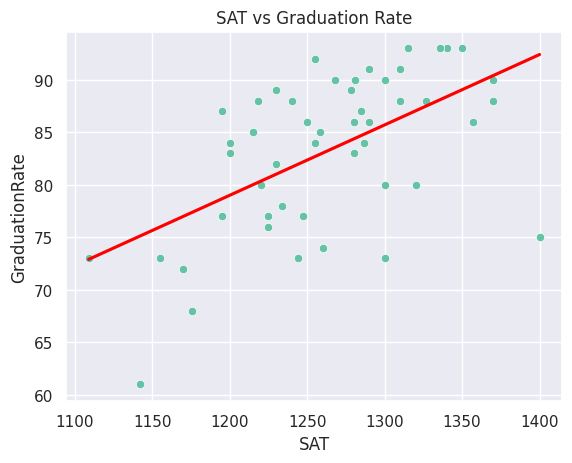

In [ ]:
sns.scatterplot(x='SAT', y='GraduationRate', data=df)
sns.regplot(x='SAT', y='GraduationRate', data=df, scatter=False, color='red', ci=None)
plt.title("SAT vs Graduation Rate")
plt.show()

There seems to be a relationship between X and Y, and it appears it can be fit by a line.

We can also check the correlation between them:

In [ ]:
print(f"The correlation between SAT and Graduation Rate is {df['SAT'].corr(df['GraduationRate'])}")

The correlation between SAT and Graduation Rate is 0.5641468266974192


The correlation coefficient also suggests there is a moderate relationship between the variables.

# Model Development

In [ ]:
X = sm.add_constant(df['SAT'])
y = df["GraduationRate"]

model = sm.OLS(y, X).fit()

print(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:         GraduationRate   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     21.94
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.43e-05
Time:                        02:37:38   Log-Likelihood:                -158.03
No. Observations:                  49   AIC:                             320.1
Df Residuals:                      47   BIC:                             323.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4380     18.100     -0.079      0.9

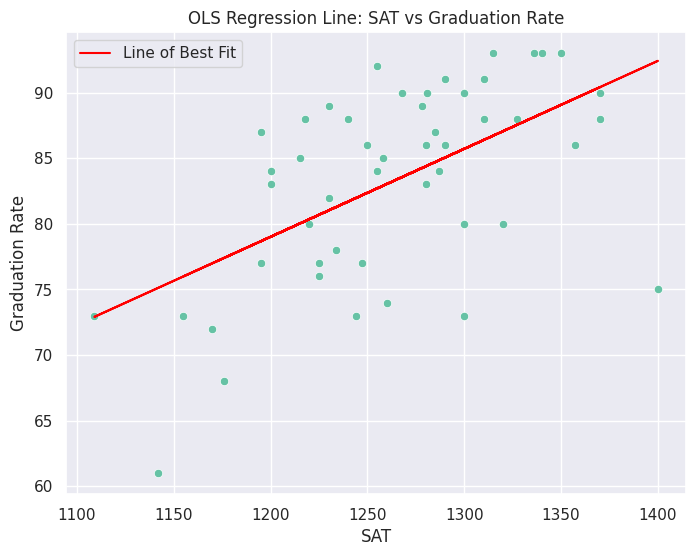

In [ ]:
# Plot the actual data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['SAT'], y=df["GraduationRate"])

# Plot the fitted line
predicted = model.predict(X)
plt.plot(df['SAT'], predicted, color='red', label='Line of Best Fit')

# Add labels and legend
plt.xlabel('SAT')
plt.ylabel('Graduation Rate')
plt.title('OLS Regression Line: SAT vs Graduation Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
intercept, slope = model.params
print(intercept)
print(slope)

-1.4380197812340958
0.06704360772443074


In [ ]:
y_pred = [slope*i + intercept  for i in df['SAT']]

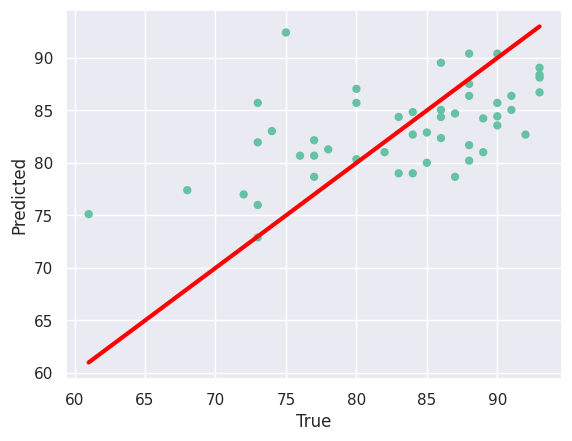

In [ ]:
fig,ax = plt.subplots()
ax.scatter(df["GraduationRate"], y_pred, edgecolors="None")
ax.plot([df["GraduationRate"].min(), df["GraduationRate"].max()],[df["GraduationRate"].min(), df["GraduationRate"].max()],'r',lw=3)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

# Interpreting the model

To interpret the model, we access the model summary. In statsmodels, it consists of three tables:

In [ ]:
print(model.summary2().as_text())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.304   
Dependent Variable: GraduationRate   AIC:                320.0588
Date:               2025-07-19 07:37 BIC:                323.8424
No. Observations:   49               Log-Likelihood:     -158.03 
Df Model:           1                F-statistic:        21.94   
Df Residuals:       47               Prob (F-statistic): 2.43e-05
R-squared:          0.318            Scale:              38.628  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -1.4380   18.1003  -0.0794  0.9370  -37.8512  34.9752
SAT           0.0670    0.0143   4.6842  0.0000    0.0382   0.0958
-----------------------------------------------------------------
Omnibus:               6.297        Durbin-Watson:          1.981
Prob(Omnibus):        

The elements of the summary that are of main interest for us at the moment are:

(1) **Coefficients on the variables**. These are shown in the second table of the summary. The "coef" column shows the actual coefficients: -1.438 for the intercept, and 0.067 for the SAT variable. Thus, our model is described by the line: $GraduationRate = -1.438 + 0.067*SAT + e$.

(2) **Significance of the variables**. The summary includes results of a t-test assessing if the estimated coeffients are significantly different from 0. If they were not different from 0, that would mean that the variable itself has no effect on the dependent variable, and can be deleted from the model. The significance can be judged from the p-value associated with the t-test. In the table, we see that the intercept is not significant (p=0.937, that is much greater than the usual significance level of 0.05), and so can be ignored when making predictions. The coefficient on SAT is significant (p=0.000, i.e., below $\alpha = 0.05$), and thus this factor does have an effect on the dependent variable.

(3) **Quality of the model**. The $R^2$ and the adjusted $R^2$ values are shown in the first table. Both are around 0.3, which indicates that the model is quite far from perfect. 31.8% of the variance in GraduationRate is explained by SAT scores. Obviously, there are other factors that affect the graduation rate that our model did not take into account.

# Checking Assumption

Two of the main assumptions of linear regression is that the residuals (i.e., errors, the differences between the true and fitted values of  y ) are equally scattered around zero, and that the errors are normally distributed.

We can plot the error values to confirm if these assumptions are valid for our model. The "raw" residuals are available as the resid attribute of the model object. However, it is often more useful to look at standardized residuals (standardized residuals are residuals divided by their standard deviation, which helps to detect outliers and compare plots from different models).

The plot below shows the relationship between standardized residuals and the fitted values for the dependent variable.

## 1. Zero mean of residuals

In [ ]:
# Step 1: Extract residuals
residuals = model.resid

# Step 2: Compute mean of residuals
mean_residual = residuals.mean()

# Step 3: Print result
print(f"Mean of residuals: {mean_residual:.6f}")

Mean of residuals: 0.000000


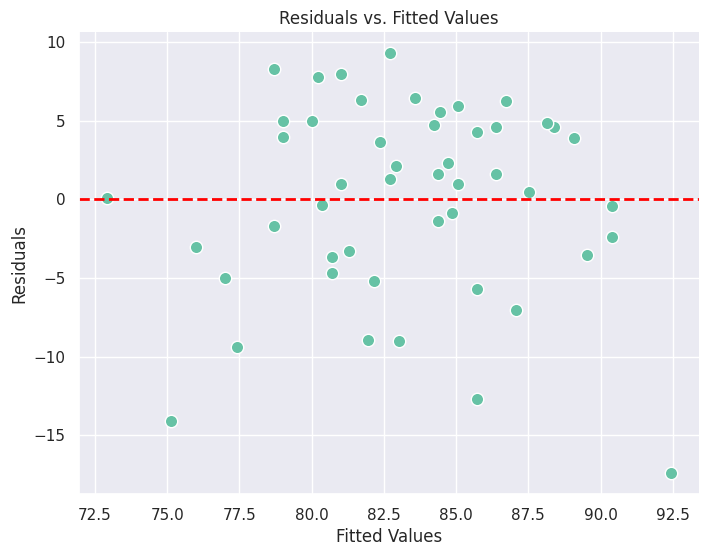

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(), y=model.resid, alpha=1.0, s=80,linewidth=1)
sns.despine()
plt.axhline(0, color='red', linestyle='--',linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

We see that the residuals are randomly **scattered around zero**, and there is no apparent pattern to the residuals, which suggests that **a linear model is appropriate for this relationship** (if there was a pattern, such as a U-shape, this would indicate a non-linear relationship).

## 2. Normality of Residuals

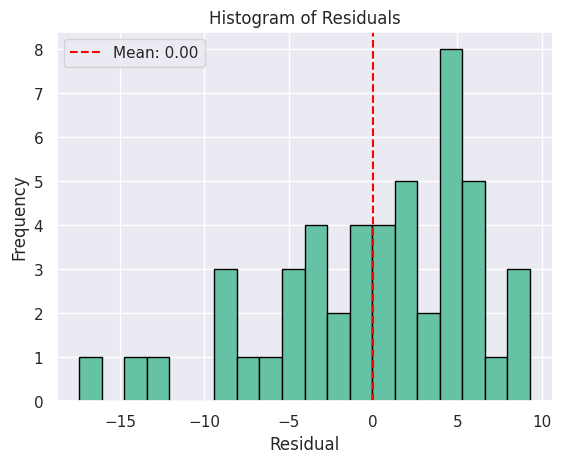

In [ ]:
residuals = model.resid

plt.hist(residuals, bins=20, edgecolor='black')
plt.axvline(residuals.mean(), color='red', linestyle='--', label=f"Mean: {residuals.mean():.2f}")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.legend()
plt.show()

The plots also show that while the errors are approximately equally distributed around 0, the errors do not quite seem to be normally distributed.

Also, if we look at the third table in the summary of the model, it contains the results of the Jarque-Bera test on the residuals, which tests for the normality of their distribution. The p-value of the Jarque-Bera statistic is 0.06, which means that we would fail to reject it at the 0.05 level. In other words, the distribution of the residuals is normal

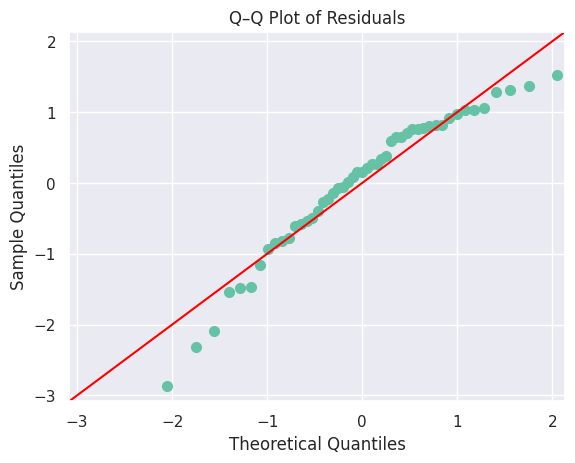

In [ ]:
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca(),
          markersize=7, color='dodgerblue', alpha=1.0)
plt.title("Q–Q Plot of Residuals")
plt.show()

This plot suggests that the central residuals are approximately normal, but:

*   The tails are slightly non-normal → mild violation of normality.
*   These are often due to outliers or heavy-tailed distributions.

 This level of deviation is not alarming and often acceptable in regression

## 3. Homoskedasticity: constant error variance

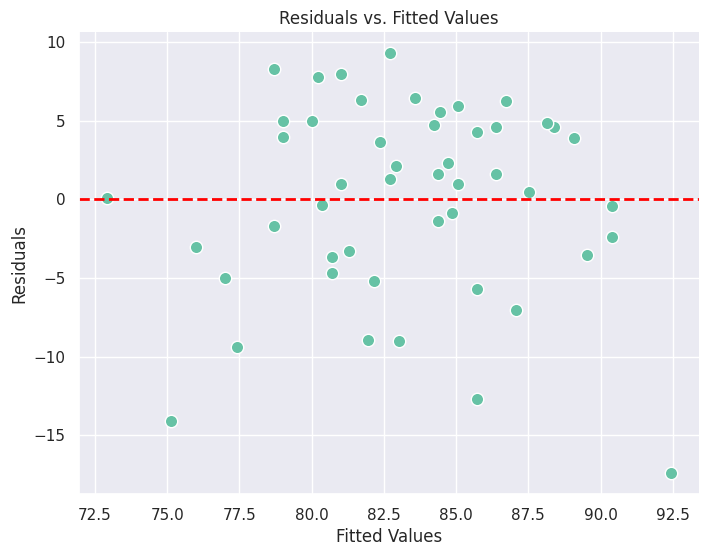

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(), y=model.resid, alpha=1.0, s=80,linewidth=1)
sns.despine()
plt.axhline(0, color='red', linestyle='--',linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

The spread of residuals appears fairly constant across the range of fitted values.

The assumption of constant variance (homoscedasticity) appears to be satisfied based on visual inspection.

## 4. Independence of the errors

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin–Watson statistic: {dw_stat:.4f}")


Durbin–Watson statistic: 1.9807


This value is very close to 2.0, and well within the safe range (1.5–2.5).
The residuals in the regression model appear to be independent — there is no evidence of autocorrelation.

This means the Independence of Errors assumption is satisfied, and the standard errors and p-values are reliable.



# **Citing This Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Principles of Data Analytics. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-315---Principles-of-Data-Analytics/tree/main